**Содержание**:

1. [Теория](https://colab.research.google.com/drive/1pMqzLFl-moKOQVb113-OB8W4pp7wLSQg?usp=sharing)
2. Практический ноутбук 1
2. [Практический ноутбук 2](https://colab.research.google.com/drive/1sKyORud34YyoWFR2Gbecp5pgUbRgJs9n?usp=sharing)

# Ведение в генетические алгоритмы (практика)


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...).

Свою копию вы сможете изменять и запускать.

In [ ]:
# Импортируем библиотку генерации случайных значений
import random as random 

# Импортируем библиотеку numpy
import numpy as np 

# Импортируем модуль pyplot библиотеки matplotlib
import matplotlib.pyplot as plt 

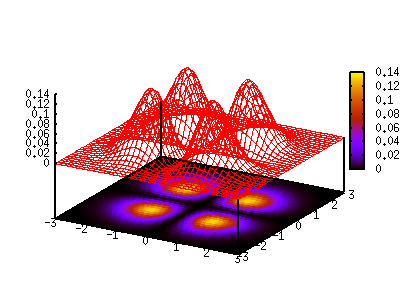

# Задача - поиск минимума функции


Задача поиска минимума(максимума) функции от многих переменных, одна из базовых задач, так как решая любую из задач методами нейронных стей мы сразу же видим понятия:
- loss - функция ошибки
- metric - функция точности

И в самом методе обучения нейронных сетей постоянно идет нахождения минимума и максимума соответсвующих функций, путем нахождения частных производных.

Но можем ли мы решить данную задачу методом генитческого отбора?

Далее мы разберем поиск минимума у функции двух переменных  
`f(x,y) = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y`

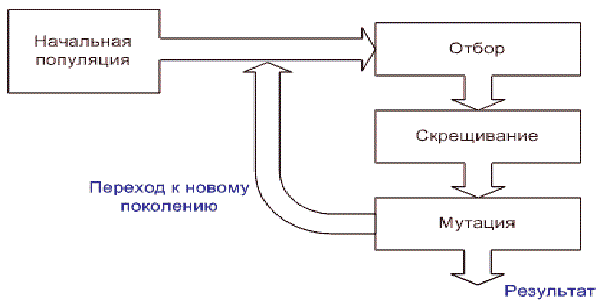

Вспоминая схему генетического алгоритма, мы видим, что нам потребуется несколько основных шагов и алгоритмов их осуществления

## Бот популяции

Бот популяции формируется в соответствии с задачей, которую он должен выполнять. В нашей задаче по поиску минимума функции, а точнее поиска пересечение с 0, бот будет производить случайные значения по x и по y соответственно.

Казалось бы каждый бот должен состоять из двух генов, так как у нас две оси. Но для вариативности поиска лучшего смещения по каждому направлению мы будем использывать несколько генов, а именно 4-е.

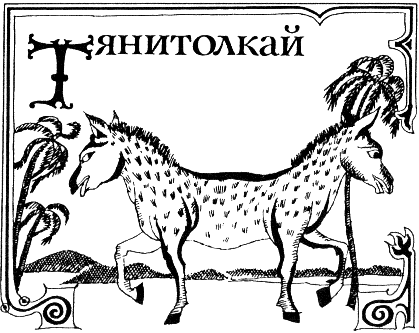

В ниже приведенной ячейке видно, как будет бот, состаящий из 8-ми генов будет формировать значение x и y. Множители перед каждым геном бота могут быть разными, мы предложили свои и по ним видно, что каждый ген будет с разной силой влиять (см. картинку выше "тяни-толкай") на итоговое значение по х и по у, по сути для грубой и более точной подстройки и поиска итогого значения

In [ ]:
# создадим бот вручную 
bot = [0.11, 0.34, 0.21, 0.19, 0.91, 0.15, 0.67, 0.66, 0.22, 0.49]

# применим бот к нахождению значений x и y
x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3] # первые 4 значения отводим для Х
y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] # вторые 4 значения - для Y

# для кодирования применяем эту функцию 
f = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y 

# выведим  полученный результат
print((x,y))
print(f)

(8.66, 24.86)
50.16804894713537


И так, мы будем иметь ботов длины 8 и чтобы не делать их вручную, будем создавать ботов случайно методм `random.random()`

In [ ]:
l = 8 # Длина бота
bot = [] # пустой бот

# Проходим по всей длине бота
for j in range(l): 
    # В каждый компонент бота записываем рандомное значение 
    bot.append(random.random())

print(bot)

[0.6274246255332006, 0.7359856132537332, 0.5324014023581637, 0.07710254539167227, 0.5564699100910256, 0.5044952891469839, 0.519065624728819, 0.42735477205700356]


## Генерация стартовой популяции

Чтобы создать поппуляцию из 100 ботов, мы в цикле `for in ` повторим код выше для создания случайного бота и бкдем добовлять в изначальный пустой список `popul` методом `append()` вновь созданны бот

100 ботов по 8 ген каждый

In [ ]:
popul = [] # Двумерный массив популяции, размерностью [n, l]. 
n = 100 # Размер популяции

# Проходим по всей длине популяции
for i in range(n): 
    bot = []
    # Создаем пустого бота
    popul.append(bot) 
    
    # Проходим по всей длине бота
    for j in range(l): 
        # В каждый компонент бота записываем рандомное значение 
        bot.append(random.random()) 

# Выведем первый 5ть ботов
for bot in popul[:5]:
   print(bot)

[0.6345081458664096, 0.8100696713221177, 0.4607664829830911, 0.9622795463221938, 0.7496418937580325, 0.10775592104488962, 0.5853953169218388, 0.21327545784895385]
[0.7645390878704794, 0.08365718502367792, 0.46788385380534847, 0.1599022438338612, 0.7139035896631253, 0.23035190453827858, 0.6377636382548632, 0.829663841007849]
[0.5690577146775669, 0.07997959523233589, 0.4597996488476692, 0.7334594759985574, 0.7928045129883294, 0.7459315764042972, 0.13518334926089415, 0.43865203377052653]
[0.9177357851536463, 0.41814130554874274, 0.0484541759650392, 0.2732204500866645, 0.8880560719844884, 0.2685028726653318, 0.18108210351085385, 0.7771914219246518]
[0.9396242249621116, 0.23080620922145934, 0.771945103997832, 0.846726965232089, 0.6088845764750579, 0.8187199370380268, 0.007634835559454767, 0.08902132991632172]


## Проверка ботов на результат

Теперь ранее созданную популяцию ботов мы можем проверить на то, как ее боты справляются с поставленой задачей.
- в цикле `for in` берем очередного бота популяции
- согласно выше предложенному методу формирования значений `x` и `y` из генов бота, мы получаем значения `x` и `y`
- подставляем значение `x` и `y` в нашу функцию и сохраняем в `f` результа.
- добавляем значение абсолютное значение методом `abs()` от `f` в изначально пустой список `val`. Абсолютное начение, так как мы можем стремиться к `0` и снизу и сверху

In [ ]:
val = [] # создаем пустой список для сбора результатов

# Проходим по всей длине популяции
for bot in popul: 
    
    # в каждом боте должны быть закодированы парные значения x-y
    x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3] # первые 4 значения отводим для Х
    y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] # вторые 4 значения - для Y

    # для кодирования применяем эту функцию
    f = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y 
    val.append(abs(f)) # добавляем модуль значения в список на эпоху                            

Распечатаем первые 10ть значений. Видно, что результаты разные и в хаотичном порядке

In [ ]:
for res in val[:25]:
   print(res)     

20.114538113781286
59.747558930387
27.854473873339987
44.60038409595357
11.407062508760912
36.903473362846334
39.116581521115144
25.635431057319337
30.489671576738687
24.394522699461582
21.3949058580869
24.882822391233297
38.44981998575049
19.700999117004034
26.08965889945744
38.151209241606544
21.543592918552964
60.91486350295801
17.203929680862746
33.489452776142265
36.083624383245876
36.648651913429184
30.764292129631123
51.82408560570467
19.52396788755582


Проведем сортировку списка методом меньшего к большему методом  `sorted(val, reverse=False)` и выведем первый  `25`

In [ ]:
sval = sorted(val, reverse=False)
for res in sval[:25]:
   print(res)  

8.581467590223196
8.806913546058734
11.407062508760912
11.961824818601482
13.96857318690875
14.141235521578663
14.380688013647354
15.643915135348688
16.07341283257309
16.73482914032664
16.85897824618073
17.203929680862746
18.896176744189518
19.52396788755582
19.700999117004034
20.114538113781286
20.7454881372342
21.090954884097094
21.3949058580869
21.543592918552964
21.706538340016667
21.78443606035197
24.170762843560542
24.383257783645327
24.389488091593147


## Популяция родителей

Теперь мы можем отобрать первыей 20ть лучших ботов и назначить их родителями. 

Так как эту процедуру и по сортировке и по отбору мы будем делать каждую эпоху и по сути это связанные опрации, то для удобства можно собрать их в единую функцию, см. ниже

В функции к выше разобранным еще появилась строка `index = val.index(sval[i])`. В этой строке методом `index()` от падавемого в цикле `for in` очередного значения отсортированого списка `sval` индекс ему соответсвующий в изначальном списке `val`. Тем самым мы по лучим индексы и соответсвующих этим значениям ботов, с помощью которых мы их и отберем для сохранения в список `newpopul`

In [ ]:
def getSurvPopul(
        popul,
        val,
        nsurv,
        reverse
        ):
    '''
    Функция получения выжившей популяции
        Входные параметры:
        - popul - наша популяция
        - val - текущие значения
        - nsurv - количество выживших
        - reverse - указываем требуемую операцию поиска результата: максимизация или минимизация
    '''
    # Двумерный массив для новой популяции
    newpopul = [] 
    
    # Сортируем зачения в val в зависимости от параметра reverse    
    sval = sorted(val, reverse=reverse) 

    # Проходимся по циклу nsurv-раз (в итоге в newpopul запишется nsurv-лучших показателей)
    for i in range(nsurv): 
        
        # Получаем индекс i-того элемента sval в исходном массиве val
        index = val.index(sval[i])
        # В новую папуляцию добавляем элемент из текущей популяции с найденным индексом
        newpopul.append(popul[index])
    
    # Возвращаем новую популяцию (из nsurv элементов) и сортированный список    
    return newpopul, sval 

Применим функцию `getSurvPopul()` к популяции `popul` с собранными значениями `val`

In [ ]:
# Количество выживших (столько лучших переходит в новую популяцию)
nsurv = 20 

# Получаем новую популяцию и сортированный список значнией
newpopul, sval = getSurvPopul(popul, val, nsurv, reverse = 0)

# выведим результаты сохраненных ботов и их самих
for i in range(nsurv):
    print(f'бот, {newpopul[i]},  результат, {sval[i]}')

бот, [0.6345081458664096, 0.8100696713221177, 0.4607664829830911, 0.9622795463221938, 0.7496418937580325, 0.10775592104488962, 0.5853953169218388, 0.21327545784895385],  результат, 8.581467590223196
бот, [0.7645390878704794, 0.08365718502367792, 0.46788385380534847, 0.1599022438338612, 0.7139035896631253, 0.23035190453827858, 0.6377636382548632, 0.829663841007849],  результат, 8.806913546058734
бот, [0.5690577146775669, 0.07997959523233589, 0.4597996488476692, 0.7334594759985574, 0.7928045129883294, 0.7459315764042972, 0.13518334926089415, 0.43865203377052653],  результат, 11.407062508760912
бот, [0.9177357851536463, 0.41814130554874274, 0.0484541759650392, 0.2732204500866645, 0.8880560719844884, 0.2685028726653318, 0.18108210351085385, 0.7771914219246518],  результат, 11.961824818601482
бот, [0.9396242249621116, 0.23080620922145934, 0.771945103997832, 0.846726965232089, 0.6088845764750579, 0.8187199370380268, 0.007634835559454767, 0.08902132991632172],  результат, 13.96857318690875
бо

Теперь из популяции родителей можно выбирать случайным способом пару родителей.

Для этого методом `random.randint()` по индексам от `0` до  `nsurv - 1` мы дважды выберим слцчайный индекс и с помощью этих индексов отберем 2х родителей.

Все это мы свернем также в функцию `getParents()` см.ниже

In [ ]:
def getParents(
        curr_popul,
        nsurv
        ):   

    '''
    Функция получения родителей
        Входные параметры:
        - curr_popul - текущая популяция
        - nsurv - количество выживших
    '''
    # Получаем дважды случайный индекс родителе в диапазоне от 0 до nsurv - 1
    indexp1 = random.randint(0, nsurv - 1)
    indexp2 = random.randint(0, nsurv - 1) 

    # Получаем первого бота-родителя по indexp1
    botp1 = curr_popul[indexp1] 

    # Получаем второго бота-родителя по indexp2 
    botp2 = curr_popul[indexp2]    
    
    # Возвращаем обоих полученных ботов
    return botp1, botp2 

Применим функцию для получения 2х родителей

In [ ]:
parent_1, parent_2 = getParents(newpopul,nsurv)
print('родитель 1', parent_1)
print('родитель 2', parent_2)

родитель 1 [0.7366730049824952, 0.8040776074286438, 0.6880292914973556, 0.5376137631998046, 0.32194794752467204, 0.5796918708290963, 0.4784144570722526, 0.1717567666041947]
родитель 2 [0.6584693071066807, 0.13690052618756443, 0.9545890463397533, 0.778193479605602, 0.1387469654720127, 0.7661797507114142, 0.0033168125136284754, 0.36935908950425467]


## Скрещивание и мутация гена

Следующим шагом будет получение нового бота от выбранных двух родителей

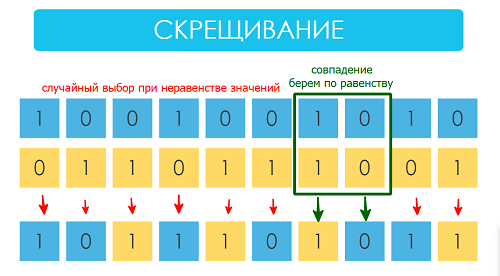

В очередной функции `crossPointFrom2Parents()` по получению гена нового бота (см.ниже), мы будем из генов по индексу `idx` каждого из родителей выбирать путем "орел-решка", используя метод `random.random()`, ген или первого родителя или второго. Назовем это значение `pindex`
- если гены совпадают, то при любом значении `pindex` ген будет единый.
- если гены разные, то при значении `pindex` менее `0.5` берем ген первого, а более `0.5` берем от второго

In [ ]:
def crossPointFrom2Parents(
        botp1,
        botp2, 
        idx
        ):
    
    '''
    Функция смешивания (кроссинговера) двух родителей
        Входные параметры:
        - botp1 - первый бот-родитель
        - botp2 - второй бот-родитель
        - idx - номер компонента бота
    '''
    
    # Получаем случайное число в диапазоне от 0 до 1
    pindex = random.random() 
    
    # Если pindex меньше 0.5, то берем ген первого бота, иначе от второго
    if pindex < 0.5:
        x = botp1[idx]
    else:
        x = botp2[idx]
    
    # Возвращаем значние гена
    return x 

Посмотрим ниже как работает. Нажимая каждый раз ячейку вновь, видно, что выбирается случайно ген одного из родителей

In [ ]:
idx = 4 # индекс гена
print('ген родителя_1', parent_1[idx]) # ген с индексом idx 1го родителя
print('ген родителя_2', parent_2[idx]) # ген с индексом idx 2го родителя

# ген с индексом idx нового бота
gen_newbot = crossPointFrom2Parents(parent_1, parent_2, idx)
print('ген нового бота', gen_newbot)

ген родителя_1 0.32194794752467204
ген родителя_2 0.1387469654720127
ген нового бота 0.32194794752467204


И как было ранее в теоретической части, нам нужно применить случайную мутацию к полученному гену.

Мы введем коэфициент мутации `mut` и умножим его на случайной значение из диапазона `-0.5 : 0.5` и полученное значение мутации мы добавим к полученному от родителей гену.

Тем самым у нас мутация буддет мутация в каждом гене. Это один из множества подходов к созданию мутации в гене (каждом или/и случайном).

In [ ]:
mut = 0.25 # Коэфициент мутаций
print('ген нового бота от родителей', gen_newbot)

add_mut = mut*(2*random.random() - 1.0)
print('слагаемое мутации в ген нового бота', add_mut)

gen_newbot += add_mut # добавление слогаемого мутации
print('ген нового бота с мутацией', gen_newbot)

ген нового бота от родителей 0.32194794752467204
слагаемое мутации в ген нового бота 0.0014370754912298445
ген нового бота с мутацией 0.3233850230159019


Теперь пройдя в цикле `for in` по длине бота, мы полностью соберем нового бота от двух родителей и слагаемых мутации в каждом гене

In [ ]:
newbot = [] # пустой массив для нового бота
mut = 0.25 # Коэфициент мутаций

# проходимся по длине бота и осуществляем смешивание/скрещивание от родителей
for i in range(l):  
    
    # Получаем значение для j-ого компонента бота
    gen_newbot = crossPointFrom2Parents(parent_1, parent_2, i) 
    # Добавялем к значению бота случайную величину, зависящую от коэфециента мутации        
    gen_newbot += mut*(2*random.random() - 1.0)
    # Добавялем новое значение в бота 
    newbot.append(gen_newbot)  

print('новый бот', newbot)   

новый бот [0.6484526261556827, 1.0381654147981403, 0.5815326133932173, 0.7293850474359868, 0.10268350354586475, 0.8315563819513125, 0.04107065983977021, 0.08435143836479297]


## Формирование новой популяции

У нас уже есть часть новой популяции из "выживших" `nsurv` родителей, нам осстается добавить в новую популяцию еще `nnew = n - nsurv` новых ботов.

Это мы сделаем также в цикле `for in` 

In [ ]:
nnew = n - nsurv

# Проходимся в цикле nnew-раз 
for i in range(nnew): 
    
    # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
    botp1, botp2 = getParents(newpopul, nsurv) 
    # Массив для нового бота
    newbot = [] 
    
    # проходимся по длине бота и осуществляем смешивание/скрещивание от родителей
    for j in range(l): 
        
        # Получаем значение для j-ого компонента бота
        x = crossPointFrom2Parents(botp1, botp2, j) 
        # Добавялем к значению бота случайную величину, зависящую от коэфециента мутации        
        x += mut*(2*random.random() - 1.0) 
        # Добавялем новое значение в бота  
        newbot.append(x)     
    
    # Добавляем бота в новую популяцию 
    newpopul.append(newbot) 

# Выведем последние 5ть ботов
print(len(newpopul))

for newbot in newpopul[-5:]:
   print(newbot)

100
[0.728606255797163, 0.618424359071897, 0.4793182765140265, 0.6963380282937107, 0.9324092965653716, 0.0914851827729542, 0.253372871764352, 0.09758199035222254]
[-0.1362120689559787, 0.9796095291352453, 0.13737265831459688, 0.7421080541963027, 0.7220188012608514, 0.5796013386423682, 0.8690155221902673, 0.3694423932478123]
[-0.02764701127241015, 0.8427124107182945, 0.7637656610629799, 0.6790856948065875, 0.42366049734834677, 0.014248571797508491, 0.34726973566681285, 0.1021289033438732]
[0.4706323012673855, 0.0840965353696746, 0.7480113324363808, 0.819833888494427, 1.000759576096388, 0.2680816111621646, 0.15931890414868455, -0.13237985228057858]
[1.0898559036684827, 0.6760730388702261, 0.6732022975999925, -0.21808342705626071, -0.11091233643404541, -0.04682231754471711, 1.0372780158788988, 0.3469979452886763]


Мы прошли полный круг от создания стартовой популяции, через проверку, отбор и формирование новой популяции от "выживших" родителей. 

Далее мы назовем новую популяцию просто популяцией `popul = newpopul`так как она будет стартовой для новой эпохию

Тем самым мы можем завернуть весь выше пройденный путь в цикл эпок с выводом промежуточных результатов

## Полный цикл генетического поиска

соберем весь разобранный выше код в единый в цикле `for in` в размере `epohs`

In [ ]:
n = 100          # Размер популяции
nsurv = 20       # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n - nsurv # Количество новых (столько новых ботов создается)
l = 8            # Длина бота
epohs = 500      # Количество эпох

mut = 0.25       # Коэфициент мутаций

popul = []       # Двумерный массив популяции, размерностью [n, l]. 100 ботов по 8 компонентов каждый
val = []         # Одномерный массив значений этих ботов

# Проходим по всей длине популяции
for i in range(n): 
    
    # Создаем пустого бота
    popul.append([]) 
    
    
    # Проходим по всей длине бота
    for j in range(l): 
        
        # В каждый компонент бота записываем рандомное значение 
        popul[i].append(random.random()) 

# Пробегаемся по всем эпохам
for it in range(epohs): 
    
    # Создаем пустой список для значений ботов
    val = [] 

    # Проходим по всей длине популяции
    for i in range(n): 
        # Берем очередного бота
        bot = popul[i] 
    
        # в каждом боте должны быть закодированы парные значения x-y
        x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3] # первые 4 значения отводим для Х
        y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] # вторые 4 значения - для Y
        
        # для кодирования применяем эту функцию
        f = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y 
       
        # добавляем модуль значения в список на эпоху
        val.append(abs(f)) 
                               
    # Получаем новую популяцию и сортированный список значнией
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) 
    # Выводим 5 лучших ботов
    print(it, " ", [round(s,8) for s in sval[0:5]]) 
 
    # Проходимся в цикле nnew-раз 
    for i in range(nnew):
                
        # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        botp1, botp2 = getParents(newpopul, nsurv) 
        # Массив для нового бота
        newbot = [] 
        
        # проходимся по длине бота и осуществляем смешивание/скрещивание от родителей
        for j in range(l): 
            
            # Получаем значение для j-ого компонента бота
            x = crossPointFrom2Parents(botp1, botp2, j) 
            # Добавляем к значению бота случайную величину, зависящую от коэфециента мутации 
            x += mut*(2*random.random() - 1.0)        
            # Добавляем новое значение в бота 
            newbot.append(x) # Добавялем новое значение в бота      
        
        # Добавляем бота в новую популяцию
        newpopul.append(newbot)  
        
        #(таким образом к nsurv-лучших ботов предыдующей популяции добавится nnew-новых ботов)
    
    # Записываем в popul посчитанную новую популяцию
    popul = newpopul 

0   [10.6523864, 11.32313891, 12.38844231, 12.53706259, 13.10570517]
1   [5.07409108, 8.07235657, 8.49544763, 8.57136469, 8.64978765]
2   [5.04945903, 5.07409108, 6.7907799, 6.84475219, 7.1572074]
3   [0.87416766, 2.92906038, 3.12530579, 3.60154883, 4.00901936]
4   [0.02511784, 0.03726193, 0.17413387, 0.40406492, 0.43652939]
5   [0.02511784, 0.02681675, 0.03726193, 0.17413387, 0.23534354]
6   [0.02511784, 0.02681675, 0.03726193, 0.06120703, 0.06909018]
7   [0.02134157, 0.02511784, 0.02681675, 0.03726193, 0.06120703]
8   [0.02134157, 0.02511784, 0.02681675, 0.03726193, 0.05323104]
9   [0.02134157, 0.02511784, 0.02681675, 0.03726193, 0.05323104]
10   [0.02134157, 0.02511784, 0.02681675, 0.03726193, 0.05323104]
11   [0.02134157, 0.02511784, 0.02681675, 0.03726193, 0.05323104]
12   [0.0135678, 0.02134157, 0.02511784, 0.02681675, 0.03726193]
13   [0.0135678, 0.02134157, 0.02511784, 0.02681675, 0.03726193]
14   [0.0135678, 0.02134157, 0.02511784, 0.02681675, 0.03546315]
15   [0.0135678, 0.02

В конце кода мы получаем `popul` это уже сортированная новая популяция и бот по индексу `0` это лцчший бот последней эпохи.

Подставим его гены в наш проверочный код и выведим результат

In [ ]:
# Берем первого (лучшего) бота в финальной популяции
bot = popul[0] 

# Считаем x
x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3] 

# Считаем y
y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] 

# Считаем значение функции
f = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y 

# Выводим бота (8 компонент)
print(bot) 

# Выводим значения x и y
print("x =",x, "y =", y) 

# Выводим значение функции (которое должно быть максимально близко к 0 по условию задачи)
print("f =",f) 

[0.519165460761007, 0.5382353437523053, 0.05193582986431139, -0.48565789417056626, -0.3574782614893612, 0.38542426306887173, 0.25991734985600085, 0.42419636813777073]
x = -8.41174687609851 y = 14.773725755859274
f = 8.671633645818133e-05


Выведем значения для 20 лучших ботов

In [ ]:
for i in range(20):

    bot = popul[i]  
    x = bot[0] + 5*bot[1] + 10*bot[2] + 25*bot[3]  
    y = bot[4] + 5*bot[5] + 10*bot[6] + 25*bot[7] 
    f = x*(y-5)/(17+x) + y + 0.25*y*y/x + 19/y 
    
    print(f'x = {x}, y = {y}, f = {f}') 

x = -8.41174687609851, y = 14.773725755859274, f = 8.671633645818133e-05
x = -4.019094859717978, y = 14.324257508934188, f = 0.0006455451112463706
x = -9.696840686999057, y = 12.529662268388332, f = 0.0009665864333252561
x = -6.55849615732968, y = 16.553877600187885, f = -0.001197142458927214
x = -8.092396014917034, y = 15.247369233792938, f = 0.0018165205817000096
x = -2.854613520484703, y = 11.689380731590216, f = -0.0019003346255286324
x = -10.935798742123065, y = 10.409390270686359, f = 0.0026311683780511075
x = -4.740624665586778, y = 15.493748559094676, f = 0.002655918471508034
x = -5.054445877334521, y = 15.87739760946537, f = 0.002770968977127364
x = -4.604062365590728, y = 15.301669019412145, f = 0.00331776432648323
x = -16.291280715733706, y = 5.368421343919512, f = -0.0034991915128532725
x = -7.866765157794117, y = 15.54655156987116, f = 0.0036872746063045803
x = -7.642649202942605, y = 15.812754646770681, f = 0.0037548825091933136
x = -7.770628493893136, y = 15.664742817901

# Задача - распределение грузов по поездам

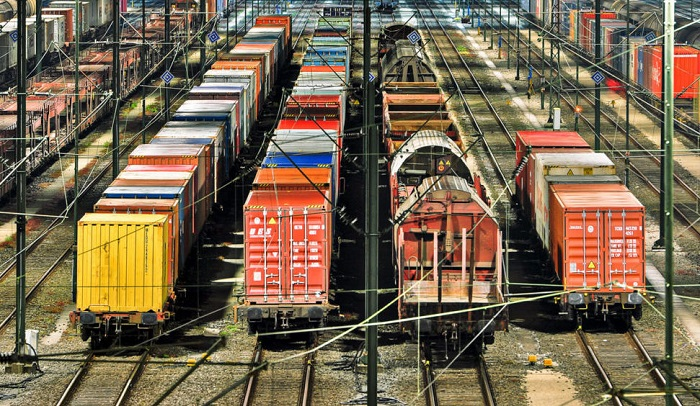

У нас есть `8` вагонов сумарной вместимостью `85 kg` , а вместимость каждого вагона `11, 18, 6, 15, 9, 3, 2, 21` соответственно.

Нам дано `17` грузов массой `11, 18, 6, 15, 9, 3, 2, 21 kg` соответственно

Задача - распределить грузы по вагонам поезда без остатка.

Запишем условие в коде.

In [ ]:
train = np.array([11, 18, 6, 15, 9, 3, 2, 21]) # Вместимость каждого поезда

# Количество каждого груза (сумма грузов должна быть равна вместимости всех поездов (85=85))
size = np.array([5, 6, 9, 5, 4, 3, 3, 5, 8, 2, 6, 3, 2, 1, 2, 20, 1]) 

print(train.sum(), 'kg вместимость поезда')
print(size.sum(), 'kg вес грузов')

print(train.shape, 'количество вагонов в поезде')
print(size.shape, 'количество грузов')

85 kg вместимость поезда
85 kg вес грузов
(8,) количество вагонов в поезде
(17,) количество грузов


Удивительно, но данная задача решается аналогичным способом, с использыванием тех же функций.

Главное отличие, как и в любом генетическом отборе это:
- способ формирования бота, который всегда зависит от задачи
- функция проверки пригодности бота под условия задачи

## Бот популяции

Ботом популяции список длиной равной колиству грузов `l` и значениями номеров вагонов. Каждый компонент указывает индекс поезда, в котором этот груз будет размещен.

In [ ]:
l = size.shape[0]       # Длина бота(количество единиц груза) 
trains = train.shape[0] # Количество вагонов поезда

bot = [] # пустой список для создаваемого бота

for i in range(l):
    gen = random.randint(0, trains - 1)
    bot.append(gen)

print('Номера вагонов для распределения грузов', bot)

Номера вагонов для распределения грузов [0, 4, 3, 3, 7, 4, 3, 6, 6, 6, 0, 3, 3, 1, 4, 7, 7]


## Проверка ботов на результат

Получая таким образом распределение наших грузов по вагонам, мы можем далее увидеть перевес или недовес по каждому вагону и собрать это в функцию проверки пригодности данного бота

Для этого создаем список учета заполняемости каждого вагона `trainfill` и делаем его поначалу нулевым ` = np.array([0, 0, 0, 0, 0, 0, 0, 0])`

Проходимся в цикле по длине бота равному количеству грузов, берем из `j` гена бота номер вагона `idx` и добавляем значение `j` груза из списка грузов `size` в учетный список `trainfill` по индексу  `idx`.

In [ ]:
# Массив, хранящий заполняемость каждого вагона поезда
trainfill = np.array([0, 0, 0, 0, 0, 0, 0, 0]) 

# Проходим по всей длине бота 
for j in range(l): 
    
    idx = bot[j] # получаем индекс вагона из гена бота
    # добавляеи груз по номеру j из списка грузов в вагон с номером idx
    trainfill[idx] += size[j]

print('План зарузки по вагонам', trainfill)
print('Обший плана загрузки', trainfill.sum())  

План зарузки по вагонам [11  1  0 22 11  0 15 25]
Обший плана загрузки 85


Мы получаем список заполнености, который в сумме равен массе всех грузов. И теперь мы можем сверить полученное значение в каждом вагоне с контрольным.

По сути, мы для каждого вагона будем решать задачу, которую решали выше по поиску минимума, только тут каждое значение в списке `trainfill` должно стремиться к контрольным значениям по максимальной загруженности вагонов из списка `train`. 

Так как у нас сумма всех грузов равна сумме максимальной заполняемости вагонов, то значит абсолютное разницы `abs(trainfill[t] - train[t])` по каждому `t-му` вагону должна стремиться к `0`

In [ ]:
f = 0 # Обнуляем ошибку i-го бота 

# Проходим по всем вагонам поезда
for t in range(trains): 
    
    # сумируем ошибку по каждому вагону по i-му боту 
    f += abs(train[t] - trainfill[t]) 

print('Суммарная ошибка по заполняемости вагонов' , f)

Суммарная ошибка по заполняемости вагонов 52


Мы получили ошибку для конкретного бота, чемь меньше оня, тем лучше бот справился. Соответственно, мы можем также как в задаче рвнее собрать ошибки от всех ботов популяции, отсортировать и получить `nsurv` ботов "выживших" родителей для генерации новых ботов с помощью ранее созданной функции `getParents(newpopul, nsurv)`

## Смена мутации

Текущая задача уже сложнее первой, так как мы ошибку суммируем от нескольких направлений и у нас может быть много локальных минимумов по пути. Тут как и в обучении нейронной сети необходимо изменять шаг обучения. В генетическом алгоритме эту роль играет отчасти коэффициент мотации, а оптимзатор из обучения нейронных сетей здесь соответсвует методу мутации бота.

Мы применим в данной задачи и иной способ мутации генов бота и будем управлять мутацией.

- мы будем случайно выбирать будем ли мы вносить мутацию в очередной ген, получая значение от `random.random()`, и если оно менее `mut`, то вносим, а если более, то не вносим мутацию

- мутация будет в том, что мы будем назначать гену случайное значение, тем же способом как создаем ген нового бота `random.randint(0, trains - 1)`

- также мы определим сценарий уменьшения коэф-та мутации, что будет постепенно уменьшать вероятность мутирования гена.

In [ ]:
# собираем тестовую популяцию

# Двумерный массив популяции, размерностью [n, l].
popul = [] 

# Проходим по всей длине популяции
for i in range(n): 

    # добавляем пустой список для сбора очередного бота
    popul.append([]) 
    
    # Проходим по всей длине бота 
    for j in range(l):     
        # В каждый ген бота пишем случайное значение
        gen = random.randint(0, trains - 1)
        # в диапазоне от 0 до количества вагонов поезда
        popul[i].append(gen) 

# возьмем для примера родителей из нынешней популяции
parent_1 = random.choice(popul)
parent_2 = random.choice(popul)

idx = 4 # индекс гена для проверки
mut = 0.5 # коэфициент мутаций

print('ген родителя_1', parent_1[idx]) # ген с индексом idx 1го родителя
print('ген родителя_2', parent_2[idx]) # ген с индексом idx 2го родителя

# ген с индексом idx нового бота
gen_newbot = crossPointFrom2Parents(parent_1, parent_2, idx)

# С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
if (random.random() < mut):
    gen_newbot = random.randint(0, trains - 1) 
    print('мутация гена на ', gen_newbot)

print('ген нового бота', gen_newbot)

ген родителя_1 2
ген родителя_2 0
ген нового бота 2


## Полный цикл генетического поиска

соберем весь разобранный выше код в единый в цикле `for in` в размере `epohs`

Добавим еще сбор по эпохам и вывод на графике значений: 
- `plotmeanval` - средняя ошибка по всем ботам популяции на эпохе 
- `plotminval` - минимальая значение ошибки на эпохе

0   69.72   [24, 32, 38, 44, 44, 46, 48, 48, 50, 50, 50, 52, 54, 54, 54, 54, 54, 56, 56, 56]
1   62.14   [24, 28, 32, 34, 34, 36, 38, 42, 42, 44, 44, 44, 44, 46, 46, 48, 48, 48, 48, 48]
2   55.3   [22, 24, 28, 30, 32, 32, 32, 34, 34, 34, 36, 36, 38, 38, 38, 40, 40, 40, 40, 42]
3   46.78   [22, 22, 24, 24, 24, 26, 28, 28, 30, 30, 30, 30, 30, 32, 32, 32, 34, 34, 34, 34]
4   46.06   [22, 22, 22, 24, 24, 24, 24, 26, 26, 28, 28, 28, 28, 28, 28, 28, 30, 30, 30, 30]
5   48.0   [18, 22, 22, 22, 22, 22, 24, 24, 24, 24, 26, 26, 26, 28, 28, 28, 28, 28, 28, 28]
6   47.98   [18, 22, 22, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24, 26, 26, 26, 26, 28, 28, 28]
7   44.64   [18, 22, 22, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24, 24, 24, 26, 26, 26, 26, 26]
8   46.14   [18, 20, 22, 22, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24, 24, 24, 24, 26, 26, 26]
9   46.76   [18, 20, 20, 22, 22, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
10   47.82   [18, 18, 20, 20, 22, 22, 22, 22, 22, 22, 22, 22, 24, 24, 24

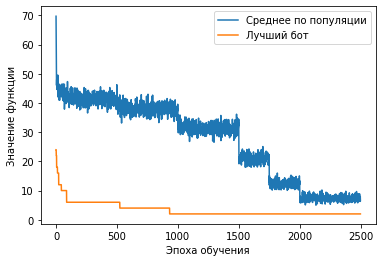

In [ ]:
n = 100        # Общее число ботов
nsurv = 20     # Количество выживших (столько лучших переходит в новую популяцию)
nnew = n-nsurv # Количество новых (столько новых ботов создается)
epohs = 2500   # количество эпох

mut = 0.5      # коэфициент мутаций
eph_change_mut = [500, 1000, 1500, 1750, 2000] # эпохи смены коэфициента мутации
new_mut = [0.45, 0.35, 0.2, 0.1, 0.05]         # новый коэфициент мутаци

l = size.shape[0]       # Длина бота (количество единиц груза)
trains = train.shape[0] # Количество вагонов поезда

popul = []     # Двумерный массив популяции, размерностью [n, l].
val = []       # Одномерный массив значений этих ботов

plotmeanval = [] # значения для графика по среднему значению
plotminval = []  # значения для графика по минимальному значению
 
# Проходим по всей длине популяции
for i in range(n): 

    # Создаем пустого бота
    popul.append([]) 
    
    # Проходим по всей длине бота 
    for j in range(l):     
        # В каждый ген бота пишем случайное значение
        gen = random.randint(0, trains - 1)
        # в диапазоне от 0 до количества вагонов поезда
        popul[i].append(gen) 

# создали список списков всех значений по эпохам
for it in range(epohs): 
    
    # проверяем текущую эпоху it на принадлежность графику смены мутации
    if it in eph_change_mut:
      
      # получаем индекс  по эпохе
      idx = eph_change_mut.index(it) 
      # проверяем текущую эпохуобновляем мутацию
      mut = new_mut[idx] 
      print('Смена мутации на', mut)
      print()  

    val = [] # Создаем пустой список для значений ботов
    
    # Проходим по всей популяции
    for i in range(n): 
                
        # Берем очередного бота
        bot = popul[i] 
        # Массив, хранящий заполняемость каждого вагона поезда
        trainfill = np.array([0, 0, 0, 0, 0, 0, 0, 0])
        
        # Проходим по всей длине бота
        for j in range(l):
              
              # получаем индекс вагона из гена бота
              idx = bot[j] 
              # добавляеи груз по номеру j из списка грузов в вагон с номером idx
              trainfill[idx] += size[j]      
        
        f = 0 # Обнуляем ошибку i-го бота 
        
        # Проходим по всем вагонам поезда
        for t in range(trains):
            # сумируем ошибку по каждому вагону по i-му боту 
            f += abs(train[t] - trainfill[t]) 
        
        # Добавляем в val значение ошибки для i-го бота 
        val.append(f)    
    
    # Получаем новую популяцию и сортированный список значнией
    newpopul, sval = getSurvPopul(popul, val, nsurv, 0) 
    
    # Выводим среднее значение и 20 лучших ботов
    print(it, " ", sum(val) / len(val), " ", sval[0:20])    
    
    # Добавляем среднее значение в список
    plotmeanval.append(sum(val) / len(val)) 
        
    # Добавляем минимальное значение в список
    plotminval.append(sval[0]) 

    # Проходимся в цикле nnew-раз
    for i in range(nnew): 
         # Из newpopul(новой популяции) получаем двух случайных родителей-ботов
        botp1, botp2 = getParents(newpopul, nsurv) 
                
        # Массив для нового бота
        newbot = [] 

        # Проходим по всей длине бота
        for j in range(l): 
            # Получаем значение для j-ого компонента бота
            x = crossPointFrom2Parents(botp1, botp2, j) 
        
            # С вероятностью mut сбрасываем значение j-ого компонента бота на случайное
            if (random.random() < mut):
                x = random.randint(0, trains - 1)        
            
            # Добавляем новое значение в бота
            newbot.append(x)       
        
        # Добавляем бота в новую популяцию
        newpopul.append(newbot)     
    
    # Записываем в popul новую посчитанную популяцию
    popul = newpopul 

# построение графиков 
plt.plot(plotmeanval, 
         label='Среднее по популяции')
plt.plot(plotminval, 
         label='Лучший бот')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

Если запускать код поиска вновь и вновь, то будет видно, что поик не так часто приходит нужному результату.

И подбор сценария мутация будет влиять на сходимость

In [ ]:
# Выводим 20 лучших ботов
for i in range(20):
    print(popul[i])

[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
[3, 0, 1, 2,

In [ ]:
# Берем лучшее значение в популяции
bot = popul[0] 

# Выводим значения бота (каждый параметр хранит номер поезда, в который следует разместить груз)
print ('Значения лучшего бота:', bot) 

# Массив заполненности поездов
trainfill = np.zeros(trains, dtype = 'int32')

# Проходим по всей длине бота
for j in range(l): 
    
    # Увеличиваем заполненность bot[j]-ого поезда на size[j]
    trainfill[bot[j]] += size[j] 

# Выводим заполненность поездов в соответствии с ботом
print ('Вместимость поездов по боту:', trainfill) 

# Выводим реальную вместимость поездов
print ('Реальная вместимость поездов:', train) 

Значения лучшего бота: [3, 0, 1, 2, 3, 0, 5, 1, 4, 6, 3, 1, 2, 4, 0, 7, 7]
Вместимость поездов по боту: [11 17  7 15  9  3  2 21]
Реальная вместимость поездов: [11 18  6 15  9  3  2 21]


**Содержание**:
1. [Теория](https://colab.research.google.com/drive/1pMqzLFl-moKOQVb113-OB8W4pp7wLSQg?usp=sharing)
2. Практический ноутбук 1
2. [Практический ноутбук 2](https://colab.research.google.com/drive/1sKyORud34YyoWFR2Gbecp5pgUbRgJs9n?usp=sharing)